# **Importing all necessary library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Overwiewing the data**

In [5]:
df=pd.read_csv(r"C:/Users/jrajv/Downloads/walmart-29-th-Oct/Walmart.csv")

In [6]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **Applying EDA**

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df["Date"] = pd.to_datetime(df["Date"],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [12]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


**Checking outlier**


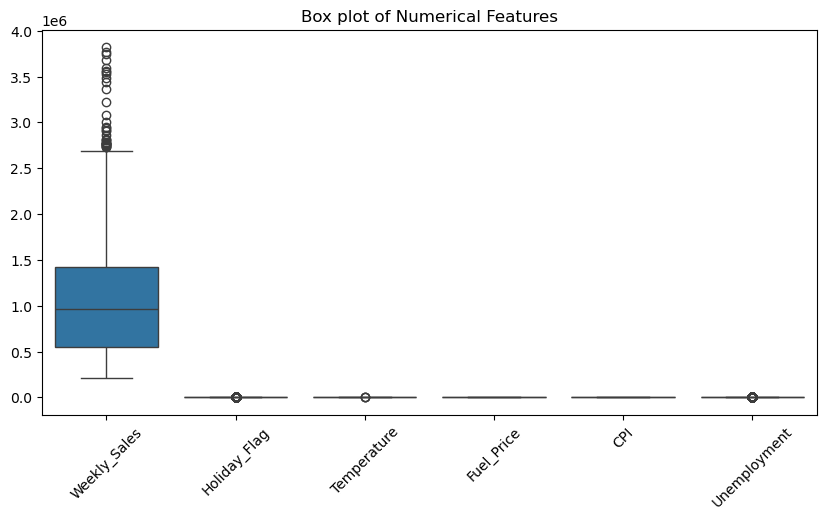

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop(columns=['Store', 'Date']))
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [15]:
# checking correlation between Weekly_Sales and Unemployment
def check_correlation(coloum_1,coloum_2):
    correlation=coloum_1.corr(coloum_2)
    return correlation

correlated=check_correlation(df['Weekly_Sales'],df['Unemployment'])
print("Pearson Correlation Coefficient:", correlated)

Pearson Correlation Coefficient: -0.10617608965795416


In [16]:
# If Weekly_sales have correlation with Unemployment then all affected store will be stored in affect_store
if abs(correlated) > 0.1:
    print("There is a strong positive correlation between 'Weekly_Sales' and 'Unemployment'.")
    mean_val=7
    affect_store=[]
    for store, unemployment in zip(df["Store"], df["Unemployment"]):
      if unemployment >= mean_val:
        affect_store.append(store)

else:
    print("There is no strong correlation between 'Weekly_Sales' and 'Unemployment'.")

There is a strong positive correlation between 'Weekly_Sales' and 'Unemployment'.


In [17]:
affect_store

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [18]:
# Check for correlation between temperature and weekly sales
correlated2=check_correlation(df['Weekly_Sales'],df['Temperature'])
print("Pearson Correlation Coefficient (Temperature vs. Weekly Sales):",correlated2 )

if abs(correlated2) > 0.1:
    print("Yes temprature affect Weekly_Sales")
else:
    print("Temprature does not afffect Weekly_Sales")

Pearson Correlation Coefficient (Temperature vs. Weekly Sales): -0.06381001317946958
Temprature does not afffect Weekly_Sales


In [19]:
correlated3=check_correlation(df['Weekly_Sales'],df['CPI'])
print("Pearson Correlation Coefficient (CPI vs. Weekly Sales):",correlated3 )

if abs(correlated3) > 0.1:
    print("Yes CPI affect Weekly_Sales")

    sns.lineplot(x=df["Weekly_Sales"],y=df["Store"])
    plt.show()

else:
  print("CPI doesent affect Weekly_Sales")

Pearson Correlation Coefficient (CPI vs. Weekly Sales): -0.07263416204017625
CPI doesent affect Weekly_Sales


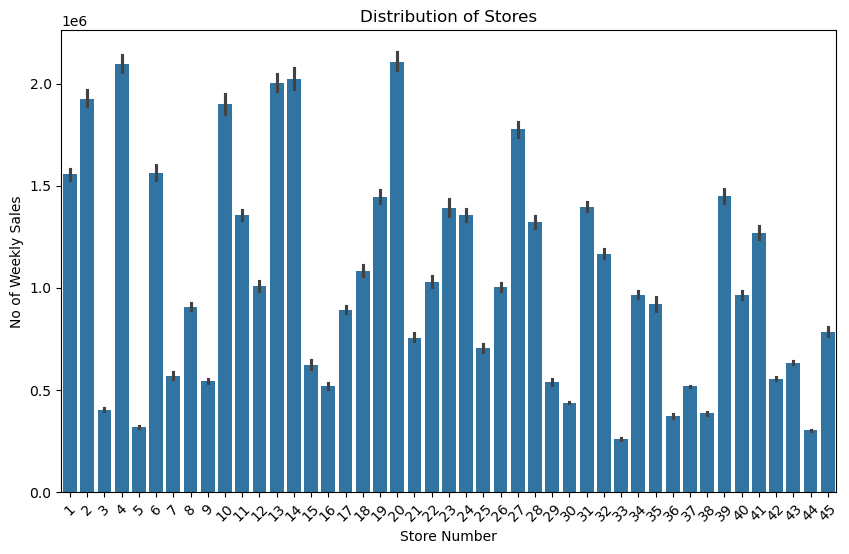

In [20]:
# Checking the relation-ship between Weekly_Sales and Stores
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Distribution of Stores')
plt.xlabel('Store Number')
plt.ylabel('No of Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Checking Top 5 performing stores according to the historical data.
grouped = df.groupby('Store')['Weekly_Sales'].sum()
grouped = grouped.sort_values(ascending=False)
grouped.head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [22]:
df_agg = df.groupby("Date")["Weekly_Sales"].sum()

In [23]:
df_agg

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

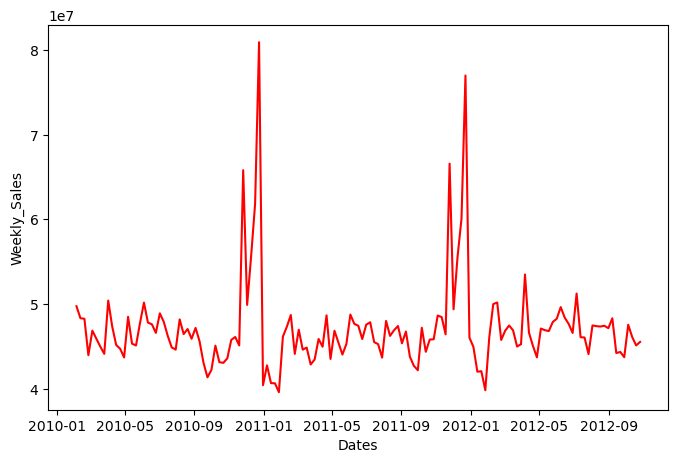

In [25]:
plt.figure(figsize = (8, 5))
plt.plot(df_agg, color = "red")
plt.xlabel("Dates")
plt.ylabel("Weekly_Sales")
plt.show()

In [26]:
def helper_check(data):
  # Rolling mean for the 1 year timeframe
  from statsmodels.tsa.stattools import adfuller
  rolling_mean = data.rolling(window = 3).mean()

  # Rolling std for the 1 year timeframe
  rolling_std = data.rolling(window = 3).std()

  original_data = sns.lineplot(data, color = "red", label = "Original Data")
  mean_data = sns.lineplot(rolling_mean, color = "yellow", label = "Rolling mean")
  std_data = sns.lineplot(rolling_std, color = "blue", label = "Rolling Std")
  plt.legend()
  plt.plot()

  results = adfuller(data)
  print(f"P-value: {results[1]}")

  if results[1] > 0.05:
    return"The data is not stationary"
  else:
    return "The data is stationary"

P-value: 2.675979158986027e-07


'The data is stationary'

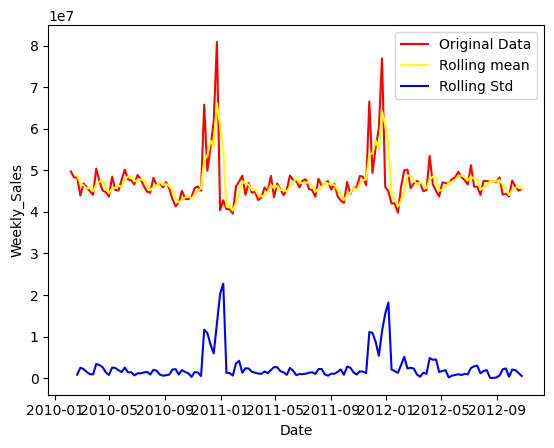

In [27]:
helper_check(df_agg)

In [28]:
import itertools
from sklearn.metrics import *
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\jrajv\anaconda3\python.exe -m pip install --upgrade pip


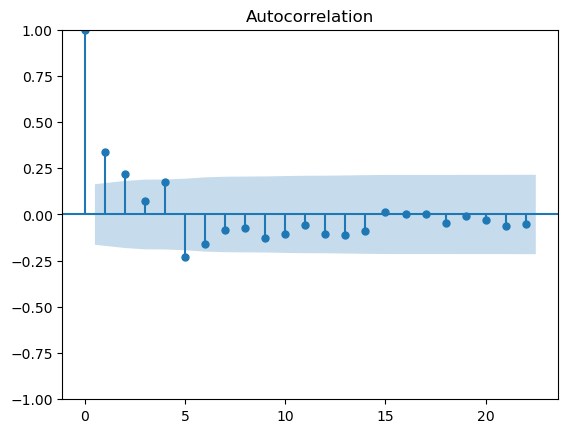

In [29]:
plot_acf(df_agg)
plt.show()
plt.close()

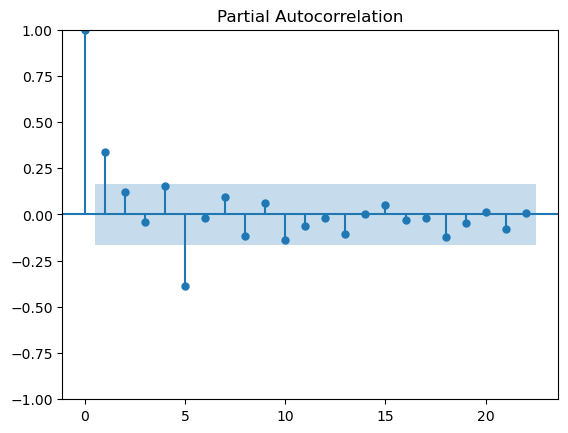

In [30]:
plot_pacf(df_agg)
plt.show()
plt.close()

In [31]:
model = auto_arima(
    df_agg,     # Data
    test = "adf",     # Test for stationarity
    start_p = 0,      # P (AR Value)
    start_q = 0,      # Q (MA values)
    seasonal = True,
    D = 0,
    max_p = 6,      # Max P (AR Value)
    max_q = 6,      # Max Q (MA Value)
    # suppress_warnings = True,   # Ignoring the warnings
    error_action = "ignore",    # Working on the errors
    stepwise = True, trace = True  # Output and step by step output
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4829.490, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4834.617, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4829.420, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4831.228, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4831.381, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4830.601, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4833.224, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.229 seconds


In [32]:
train_data=df_agg[:113]
test_data=df_agg[113:]

In [33]:
arimax_order = (5, 0, 7)
arimax_exog = None
arimax_model = ARIMA(train_data, order=arimax_order, exog=arimax_exog) # Pass order as a keyword argument
arimax_results = arimax_model.fit()

C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
# arimax_predictions = arimax_results.predict( start=0, end=len(train_data)-1, exog=arimax_exog[:len(train_data)] )

In [35]:
# Generate predictions for the test data period
arimax_predictions = arimax_results.predict(start=len(train_data), end=len(df_agg)-1, exog=arimax_exog)

# Calculate MAE
arimax_mae = mean_absolute_error(test_data, arimax_predictions)
print(f"ARIMAX MAE: {arimax_mae}")


ARIMAX MAE: 1500752.4102760197


In [36]:
pred = arimax_results.predict(0,142+12)

In [93]:
pred

2010-02-05    4.716419e+07
2010-02-12    4.797509e+07
2010-02-19    4.784749e+07
2010-02-26    4.754527e+07
2010-03-05    4.663714e+07
                  ...     
2012-12-21    4.724403e+07
2012-12-28    4.713308e+07
2013-01-04    4.707816e+07
2013-01-11    4.715671e+07
2013-01-18    4.723488e+07
Freq: W-FRI, Name: predicted_mean, Length: 155, dtype: float64

In [113]:
epsilon = 1e-10
arimax_mape = np.mean(np.abs((test_data - arimax_predictions) / (test_data + epsilon))) * 100

# Calculate Forecast Accuracy Percentage
arimax_accuracy = 100 - arimax_mape
print("Mape",arimax_mape)
print("accuracy",arimax_accuracy)

Mape 3.1574151057387265
accuracy 96.84258489426128


[]

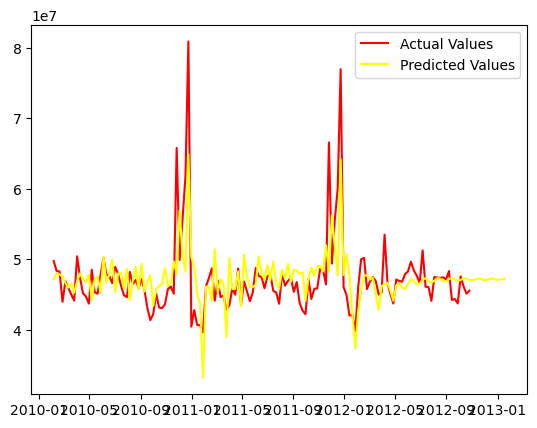

In [38]:
plt.plot(df_agg, color = "red", label = "Actual Values")
plt.plot(pred, color = "yellow", label = "Predicted Values")
plt.legend()
plt.plot()

In [39]:
sarimax_order = (5, 0, 7)
sarimax_seasonal_order = (0, 1, 1, 15)
sarimax_exog = None # Add exogenous variables if you have one

sarimax_model = SARIMAX(train_data, order=sarimax_order, seasonal_order=sarimax_seasonal_order, exog=sarimax_exog)
sarimax_results = sarimax_model.fit()

sarimax_predictions = sarimax_results.predict(start=len(train_data), end=len(df_agg)-1, exog=sarimax_exog)

C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\jrajv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
serimax_mape = np.mean(np.abs((test_data - sarimax_predictions) / (test_data + epsilon))) * 100

# Calculate Forecast Accuracy Percentage
serimax_accuracy = 100 - serimax_mape
print("Mape",serimax_mape)
print("accuracy",serimax_accuracy)

Mape 4.662126110272122
accuracy 95.33787388972787


In [41]:
sarimax_predict=sarimax_results.predict(0,143+12)

[]

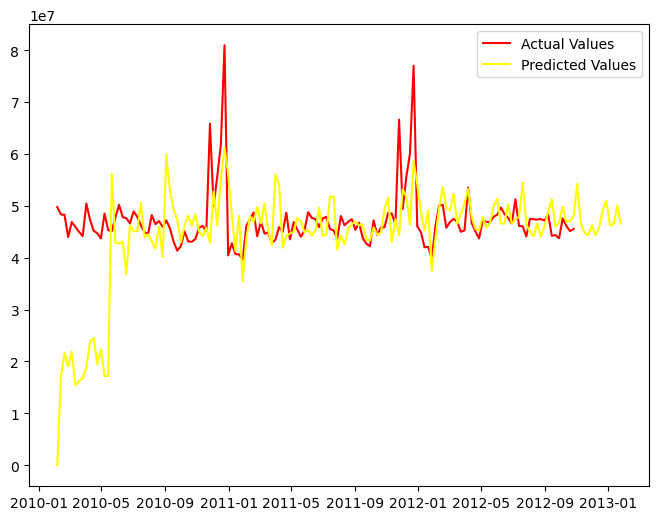

In [121]:
plt.figure(figsize=(8, 6))
plt.plot(df_agg, color = "red", label = "Actual Values")
plt.plot(sarimax_predict, color = "yellow", label = "Predicted Values")
plt.legend()
plt.plot()